In [5]:
import os
import re
import pandas as pd
import nltk
import re
import numpy as np
from pprint import pprint
import gensim # Gensim for Topic Modeling
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

In [7]:
!!pip install spacy

['Collecting spacy',
 '  Downloading spacy-3.7.2-cp310-cp310-win_amd64.whl (12.1 MB)',
 '     ---------------------------------------- 12.1/12.1 MB 6.4 MB/s eta 0:00:00',
 'Collecting typer<0.10.0,>=0.3.0',
 '  Downloading typer-0.9.0-py3-none-any.whl (45 kB)',
 '     ---------------------------------------- 45.9/45.9 kB ? eta 0:00:00',
 'Requirement already satisfied: setuptools in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from spacy) (67.6.1)',
 'Requirement already satisfied: requests<3.0.0,>=2.13.0 in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from spacy) (2.28.2)',
 'Requirement already satisfied: packaging>=20.0 in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from spacy) (23.0)',
 'Requirement already satisfied: smart-open<7.0.0,>=5.2.1 in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from spacy) (6.3.0)',
 'Collecting langcod

In [9]:
!!pip install pyLDAvis

['Collecting pyLDAvis',
 '  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)',
 'Requirement already satisfied: scikit-learn>=1.0.0 in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from pyLDAvis) (1.2.2)',
 'Requirement already satisfied: gensim in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from pyLDAvis) (4.3.1)',
 'Collecting numexpr',
 '  Using cached numexpr-2.8.7-cp310-cp310-win_amd64.whl (95 kB)',
 'Requirement already satisfied: numpy>=1.24.2 in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from pyLDAvis) (1.26.2)',
 'Requirement already satisfied: jinja2 in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from pyLDAvis) (3.1.2)',
 'Collecting pandas>=2.0.0',
 '  Using cached pandas-2.1.3-cp310-cp310-win_amd64.whl (10.7 MB)',
 'Requirement already satisfied: scipy in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\

In [10]:
from gensim.models import CoherenceModel
import spacy # spaCy for preprocessing
import pyLDAvis # Plotting tools
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter

import string
import copy
import pickle
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pyLDAvis'

In [3]:
import os

#Getting all text file location
folder_path = r'C:\Users\vasuk\Music\Articles'
file_path_folder = []
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        file_path_folder.append(file_path )    
file_path_folder

['C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_1.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_10.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_11.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_12.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_2.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_3.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_4.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_5.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_6.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_7.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_8.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\NYT_2017_ISIS_9.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\WJ_2017_ISIS_ISIL_1.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\WJ_2017_ISIS_ISIL_2.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\WJ_2017_ISIS_ISIL_3.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\WJ_2017_ISIS_ISIL_4.txt',
 'C:\\Users\\vasuk\\Music\\Articles\\

In [12]:

All_Art = []
# Specify the keywords to split the articles
keywords = ['Document', 'Document INHT', 'Document WSJ', 'Document J000','Document AWSJ']

for file_path in file_path_folder:    
    with open(file_path, encoding='utf-8-sig') as f:
        content = f.read()
        # Split the content using the specified keywords
        articl = re.split('|'.join(keywords), content)
        All_Art.extend(articl)

In [14]:
#Checking whether all articles are split correctly
Bol = []
for articles in All_Art:
    if "All Rights Reserved" in articles:
        Bol.append(True)
    else:
        Bol.append(False)
false_indices = [i for i, val in enumerate(Bol) if val == False]
print(false_indices)     

[13, 27, 31, 44, 100, 117, 218, 236, 281, 282, 291, 309, 321, 405, 406, 424, 425, 426, 436, 440, 445, 494, 531, 551, 609, 629, 635, 660, 668, 669, 673, 674, 677, 678, 732, 742, 774, 844, 945, 953, 982, 1047, 1140, 1149, 1178, 1181, 1194, 1212, 1219, 1227, 1228, 1254, 1259, 1279, 1357, 1380, 1447, 1481, 1493, 1582, 1602, 1659, 1660, 1683]


In [16]:
#Delecting them from the list
All_Art=[val for i,val in enumerate(All_Art) if i not in false_indices]
print(f"The total number of articles is given by {len(All_Art)}")

The total number of articles is given by 1620


In [17]:

All_Art[10]

" NYTF000020170101ed110007r\n\x0c\n\n\nSTATE OF TERROR\nSpecialSections; SECTF\n ISIS ' System of Rape Relies on Birth Control\n\nBy RUKMINI CALLIMACHI \n2,371 words\n1 January 2017\nThe New York Times\nNYTF\nLate Edition - Final\n9\nEnglish\nCopyright 2017 The New York Times Company.  All Rights Reserved. \n\nDOHUK, Iraq -- Locked inside a room where the only furniture was a bed, the 16-year-old learned to fear the sunset, because nightfall started the countdown to her next rape.\n\nDuring the year she was held by the Islamic State, she spent her days dreading the smell of the ISIS fighter's breath, the disgusting sounds he made and the pain he inflicted on her body. More than anything, she was tormented by the thought she might become pregnant with her rapist's child.\n\nIt was the one thing she needn't have worried about.\n\nSoon after buying her, the fighter brought the teenage girl a round box containing four strips of pills, one of them colored red.\n\n''Every day, I had to swall

In [19]:
#Spliting all articles by considering All Rights Reserved as split condition
import re
Meta_d = []
Artic = []
for article in All_Art:
    # Split article at "All Rights Reserved."
    article_parts = article.split("All Rights Reserved")
    # Remove all non-English letters and newlines from metadata and content
    metadata = re.sub(r'[^a-zA-Z\s\d]+', '', article_parts[0])
    metadata = metadata.replace('\n', ' ').replace('\n\n', ' ')
    content = re.sub(r'[^a-zA-Z\s\d]+', '', article_parts[1])
    content = content.replace('\n', ' ').replace('\n\n', ' ')
    Meta_d.append(metadata)
    Artic.append(content)
# Remove leading and trailing spaces from each element in Meta_data and Articles
Meta_data = [item.strip() for item in Meta_d]
Articles = [item.strip() for item in Artic]

In [20]:
Artic [0][:100]

'   ISTANBUL urkish officials accused the United States of abetting a failed coup last summer When th'

In [21]:
df = pd.DataFrame({'Metadata': Meta_d, 'Articles':Artic})
df

Metadata  \
0         World Europe In Turkey US Hand Is Seen in ...   
1      NYTFEED020170104ed14002gy 
   World Africa Hy...   
2      NYTFEED020170104ed14006v9 
   Foreign Desk SE...   
3      NYTF000020170104ed140005g 
   World Middle Ea...   
4      NYTFEED020170103ed13000gp 
   Foreign Desk SE...   
...                                                 ...   
1615   WSJE000020170803ed8300019 
   Tillerson Can E...   
1616   J000000020170802ed820000c 
   US Trump Admini...   
1617   WSJO000020170802ed820050l 
   Markets Iraq Se...   
1618   WSJO000020170802ed820053e 
   Opinion Tillers...   
1619   WSJO000020170801ed81002sa 
   World WarTorn S...   

                                               Articles  
0        ISTANBUL urkish officials accused the Unite...  
1        As boy bands go it was an unlikely crew  In...  
2        German prosecutors have added six counts of...  
3        BAGHDAD  suicide bomber detonated a pickup ...  
4        BAGHDAD  A suicide bomber detonated a picku...  
...                                                 ...  
1615     Defeating Islamic State is the Trump admini...  
1616     WASHINGTONhe Trump administration on Wednes...  
1617     Iraq is set to raise 1 billion through its ...  
1618     Defeating Islamic State is the Trump admini...  
1619     After the Syrian government recently introd...  

[1620 rows x 2 columns]

## Preprocessing

In [22]:
articles_content = Articles

In [23]:
#Removing date that can be any format
import re

for i in range(len(articles_content)):
    # Define regular expressions to match common date formats
    date_formats = [
        r'\d{1,2}\s(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{4}',  # 01 Jan 2022
        r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{1,2},\s\d{4}',  # Jan 01, 2022
        r'\d{1,2}\s(January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}',  # 01 January 2022
        r'(January|February|March|April|May|June|July|August|September|October|November|December)\s\d{1,2},\s\d{4}'  # January 01, 2022
    ]
    # Combine date formats into a single regular expression
    date_regex = '|'.join(date_formats)
    # Remove dates from the current article content
    articles_content[i] = re.sub(date_regex, '', articles_content[i])


In [34]:
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
nltk.download('punkt')
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
#Lower case
preprocessed_corpus = []
for document in articles_content:
    # Lowercasing
    document = document.lower()
    preprocessed_corpus.append(document)

In [36]:
# Removing punctuation and digits
preprocessed_corpus_P = []
for document in preprocessed_corpus:
    document = ''.join([char for char in document if char.isalpha() or char.isspace()])
    preprocessed_corpus_P.append(document)   
    

In [38]:
import nltk
from nltk.tokenize import word_tokenize


# Tokenizing
preprocessed_corpus_PT = []
for document in preprocessed_corpus_P:
    tokens = word_tokenize(document)
    preprocessed_corpus_PT.append(tokens)    
   

In [39]:
preprocessed_corpus_PT[0][:20]

['istanbul',
 'urkish',
 'officials',
 'accused',
 'the',
 'united',
 'states',
 'of',
 'abetting',
 'a',
 'failed',
 'coup',
 'last',
 'summer',
 'when',
 'the',
 'russian',
 'ambassador',
 'to',
 'turkey']

In [40]:
 # Removing stop words
preprocessed_corpus_PTS = []
for tokens in preprocessed_corpus_PT:
    tokens = [token for token in tokens if token not in stop_words]
    preprocessed_corpus_PTS.append(tokens) 
    

In [41]:
preprocessed_corpus_PTS[0][:20]

['istanbul',
 'urkish',
 'officials',
 'accused',
 'united',
 'states',
 'abetting',
 'failed',
 'coup',
 'last',
 'summer',
 'russian',
 'ambassador',
 'turkey',
 'assassinated',
 'last',
 'month',
 'turkish',
 'press',
 'said']

In [42]:
# Stemming
preprocessed_corpus_PTSS = []
for tokens in preprocessed_corpus_PTS:
    tokens = [porter.stem(token) for token in tokens]  
    preprocessed_corpus_PTSS.append(tokens)



In [43]:
preprocessed_corpus_PTSS[0]

['istanbul',
 'urkish',
 'offici',
 'accus',
 'unit',
 'state',
 'abet',
 'fail',
 'coup',
 'last',
 'summer',
 'russian',
 'ambassador',
 'turkey',
 'assassin',
 'last',
 'month',
 'turkish',
 'press',
 'said',
 'unit',
 'state',
 'behind',
 'attack',
 'gunman',
 'walk',
 'istanbul',
 'nightclub',
 'earli',
 'new',
 'year',
 'day',
 'kill',
 'dozen',
 'progovern',
 'news',
 'media',
 'point',
 'finger',
 'unit',
 'state',
 'merica',
 'chief',
 'suspectn',
 'headlin',
 'blare',
 'attack',
 'twitter',
 'turkish',
 'lawmak',
 'refer',
 'name',
 'nightclub',
 'wrote',
 'hoever',
 'triggerman',
 'reina',
 'attack',
 'act',
 'cia',
 'period',
 'turkey',
 'confront',
 'cascad',
 'crise',
 'seem',
 'acceler',
 'syrian',
 'civil',
 'war',
 'spill',
 'across',
 'border',
 'event',
 'push',
 'turkey',
 'closer',
 'nato',
 'alli',
 'convers',
 'drift',
 'apart',
 'nation',
 'lash',
 'washington',
 'move',
 'closer',
 'moscow',
 'work',
 'russian',
 'presid',
 'vladimir',
 'v',
 'putin',
 'secur',

In [44]:
Cleaned_corpus = []
for tokens in preprocessed_corpus_PTSS:
    tokens = ' '.join(tokens)  # join the words with spaces
    Cleaned_corpus.append(tokens)

In [45]:
Cleaned_corpus[0]

'istanbul urkish offici accus unit state abet fail coup last summer russian ambassador turkey assassin last month turkish press said unit state behind attack gunman walk istanbul nightclub earli new year day kill dozen progovern news media point finger unit state merica chief suspectn headlin blare attack twitter turkish lawmak refer name nightclub wrote hoever triggerman reina attack act cia period turkey confront cascad crise seem acceler syrian civil war spill across border event push turkey closer nato alli convers drift apart nation lash washington move closer moscow work russian presid vladimir v putin secur ceasefir syria one stori turkish press base routin travel warn issu american embassi turkey unit state advanc knowledg nightclub attack islam state later claim respons anoth suggest stun grenad use gunman come stock held american militari still anoth claim assault plot unit state sow divis turkey secular religi rather bring unit state turkey togeth common fight terror nightcl

### These are the  following pre_processing steps

 1.Lower Case the corpus
 
 2.Remove words and puntuation
 
 3.Tokenization
 
 4.Stop words
 
 5.Stemming
 
 

### Extracting features 

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming Cleaned_corpus is a list of cleaned text documents
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(Cleaned_corpus)
df_bow = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())



In [47]:
#Extracting Features
All_featr = df_bow.columns
All_featr

Index(['aa', 'aal', 'aalla', 'aamaq', 'aamur', 'aana', 'aap', 'aara', 'aaron',
       'aazaldin',
       ...
       'zumba', 'zurich', 'zusha', 'zushaelinsonwsjcom', 'zuylen', 'zverev',
       'zvornik', 'zvulunreut', 'zway', 'zy'],
      dtype='object', length=34288)

In [48]:
import pandas as pd

# Assuming you have a bag-of-words dataframe called "df"
word_freq = df_bow.sum(axis=0)  # Sum the frequency of each word across all documents
top_words = word_freq.nlargest(50)  # Get the top 50 most frequent words
top_words_dict = top_words.to_dict()  # Convert to dictionary


top_words_dict

{'said': 11546,
 'state': 10314,
 'mr': 9917,
 'trump': 7374,
 'islam': 6589,
 'presid': 4545,
 'us': 4524,
 'attack': 4197,
 'one': 4158,
 'new': 4134,
 'american': 4021,
 'peopl': 3977,
 'time': 3939,
 'syria': 3863,
 'would': 3834,
 'forc': 3825,
 'unit': 3717,
 'year': 3402,
 'offici': 3384,
 'militari': 3297,
 'group': 3296,
 'countri': 3194,
 'also': 3063,
 'iraq': 3054,
 'like': 3023,
 'say': 2794,
 'govern': 2761,
 'use': 2711,
 'go': 2704,
 'kill': 2523,
 'citi': 2468,
 'isi': 2405,
 'syrian': 2344,
 'nation': 2324,
 'last': 2307,
 'fight': 2272,
 'secur': 2247,
 'report': 2239,
 'day': 2194,
 'could': 2192,
 'iraqi': 2188,
 'two': 2144,
 'think': 2134,
 'week': 2068,
 'mani': 2014,
 'administr': 1995,
 'get': 1945,
 'even': 1931,
 'back': 1854,
 'first': 1854}

In [50]:
import matplotlib.pyplot as plt

In [54]:
import seaborn as sns

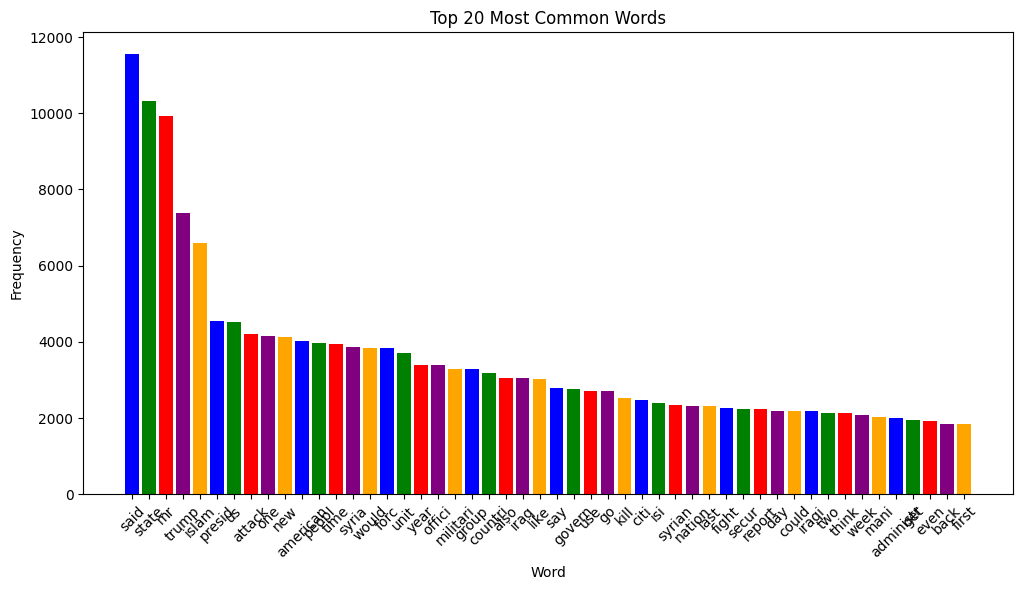

In [57]:
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']  # List of colors for each bar
plt.bar(list(top_words_dict.keys()), list(top_words_dict.values()), color=colors)
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [58]:
import wordcloud

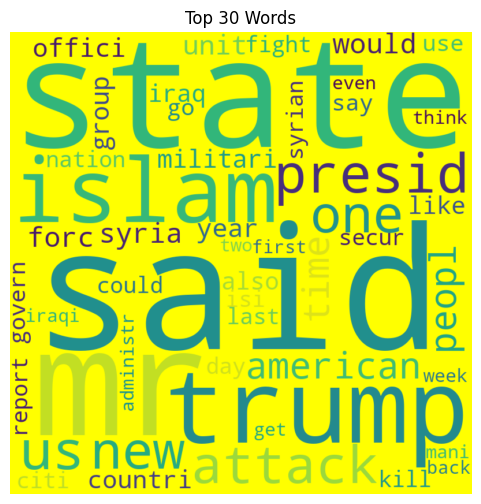

In [61]:
from wordcloud import WordCloud

# create a WordCloud object from the Bag of Words data
wordcloud = WordCloud(width=800, height=800, background_color='yellow').generate_from_frequencies( top_words_dict)

# plot the WordCloud
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 30 Words')
plt.show()

# PART-2 LDA



In [45]:
len(articles_content)

1620

In [46]:
articles_content[0][:2000]

'ISTANBUL urkish officials accused the United States of abetting a failed coup last summer When the Russian ambassador to Turkey was assassinated last month the Turkish press said the United States was behind the attack  And once again after a gunman walked into an Istanbul nightclub early on New Year Day and killed dozens the progovernment news media pointed a finger at the United States  merica Chief Suspectne headline blared after the attack On Twitter a Turkish lawmaker referring to the name of the nightclub wrote hoever the triggerman is Reina attack is an act of CIA Period  Turkey has been confronted with a cascade of crises that seem to have only accelerated as the Syrian civil war has spilled across the border But the events have not pushed Turkey closer to its NATO allies Conversely they have drifted further apart as the nation lashes out at Washington and moves closer to Moscow working with the Russian president Vladimir V Putin to secure a ceasefire in Syria  One story in th

In [47]:
# Remove Emails 
data = [re.sub('\S*@\S*\s?', '', sent) for sent in articles_content]  
# Remove new line characters 
data = [re.sub('\s+', ' ', sent) for sent in data]  
# Remove distracting single quotes 
data = [re.sub("\'", "", sent) for sent in data]  
pprint(data[:1])

['ISTANBUL urkish officials accused the United States of abetting a failed '
 'coup last summer When the Russian ambassador to Turkey was assassinated last '
 'month the Turkish press said the United States was behind the attack And '
 'once again after a gunman walked into an Istanbul nightclub early on New '
 'Year Day and killed dozens the progovernment news media pointed a finger at '
 'the United States merica Chief Suspectne headline blared after the attack On '
 'Twitter a Turkish lawmaker referring to the name of the nightclub wrote '
 'hoever the triggerman is Reina attack is an act of CIA Period Turkey has '
 'been confronted with a cascade of crises that seem to have only accelerated '
 'as the Syrian civil war has spilled across the border But the events have '
 'not pushed Turkey closer to its NATO allies Conversely they have drifted '
 'further apart as the nation lashes out at Washington and moves closer to '
 'Moscow working with the Russian president Vladimir V Putin t

In [48]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))            #deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['istanbul', 'urkish', 'officials', 'accused', 'the', 'united', 'states', 'of', 'abetting', 'failed', 'coup', 'last', 'summer', 'when', 'the', 'russian', 'ambassador', 'to', 'turkey', 'was', 'assassinated', 'last', 'month', 'the', 'turkish', 'press', 'said', 'the', 'united', 'states', 'was', 'behind', 'the', 'attack', 'and', 'once', 'again', 'after', 'gunman', 'walked', 'into', 'an', 'istanbul', 'nightclub', 'early', 'on', 'new', 'year', 'day', 'and', 'killed', 'dozens', 'the', 'progovernment', 'news', 'media', 'pointed', 'finger', 'at', 'the', 'united', 'states', 'merica', 'chief', 'suspectne', 'headline', 'blared', 'after', 'the', 'attack', 'on', 'twitter', 'turkish', 'lawmaker', 'referring', 'to', 'the', 'name', 'of', 'the', 'nightclub', 'wrote', 'hoever', 'the', 'triggerman', 'is', 'reina', 'attack', 'is', 'an', 'act', 'of', 'cia', 'period', 'turkey', 'has', 'been', 'confronted', 'with', 'cascade', 'of', 'crises', 'that', 'seem', 'to', 'have', 'only', 'accelerated', 'as', 'the', '

In [60]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['istanbul', 'urkish', 'officials', 'accused', 'the', 'united_states', 'of', 'abetting', 'failed_coup', 'last', 'summer', 'when', 'the', 'russian', 'ambassador', 'to', 'turkey', 'was', 'assassinated', 'last', 'month', 'the', 'turkish', 'press', 'said', 'the', 'united_states', 'was', 'behind', 'the', 'attack', 'and', 'once', 'again', 'after', 'gunman', 'walked', 'into', 'an', 'istanbul_nightclub', 'early', 'on', 'new', 'year', 'day', 'and', 'killed', 'dozens', 'the', 'progovernment', 'news_media', 'pointed', 'finger', 'at', 'the', 'united_states', 'merica', 'chief', 'suspectne', 'headline', 'blared', 'after', 'the', 'attack', 'on', 'twitter', 'turkish', 'lawmaker', 'referring', 'to', 'the', 'name', 'of', 'the', 'nightclub', 'wrote', 'hoever', 'the', 'triggerman', 'is', 'reina', 'attack', 'is', 'an', 'act', 'of', 'cia', 'period', 'turkey', 'has', 'been', 'confronted', 'with', 'cascade', 'of', 'crises', 'that', 'seem', 'to', 'have', 'only', 'accelerated', 'as', 'the', 'syrian', 'civil_war

In [62]:
# Define function for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [51]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.2/12.8 MB 1.7 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/12.8 MB 5.0 MB/s eta 0:00:03
     --------- ------------------------------ 2.9/12.8 MB 15.4 MB/s eta 0:00:01
     ---------------- ----------------------- 5.4/12.8 MB 23.0 MB/s eta 0:00:01
     ------------------------------ --------- 9.7/12.8 MB 34.4 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 65.6 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 65.6 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 43.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [63]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# !python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['urkish', 'official', 'accuse', 'united_state', 'abet', 'failed_coup', 'last', 'summer', 'russian', 'ambassador', 'assassinate', 'last', 'month', 'turkish', 'say', 'united_state', 'attack', 'gunman', 'walk', 'istanbul_nightclub', 'early', 'new', 'year', 'day', 'kill', 'news', 'medium', 'point', 'finger', 'united_state', 'merica', 'chief', 'suspectne', 'headline', 'blare', 'attack', 'twitter', 'turkish', 'lawmaker', 'refer', 'name', 'nightclub', 'write', 'period', 'turkey', 'confront', 'cascade', 'crisis', 'seem', 'accelerate', 'syrian', 'civil_war', 'spill', 'border', 'event', 'push', 'turkey', 'close', 'ally', 'conversely', 'drift', 'nation', 'lash', 'move', 'close', 'work', 'russian', 'president', 'secure', 'ceasefire', 'story', 'turkish', 'press', 'base', 'routine', 'travel', 'warning', 'issue', 'american', 'embassy', 'turkey', 'united_state', 'advance', 'knowledge', 'state', 'later', 'claimed_responsibility', 'suggest', 'stun', 'grenade', 'use', 'gunman', 'come', 'stock', 'hold',

In [65]:
# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized)  
# Create Corpus 
texts = data_lemmatized  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  

In [66]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 3),
  (10, 1),
  (11, 3),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 5),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 11),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 1),
  (77, 1),
  (78, 7),
  (79, 2),
  (80, 3),
  (81, 3),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 1),
  (87, 5),
  (88, 1),
  (89, 2),
  (90, 4),
  (91, 1

In [67]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abet', 1),
  ('ability', 1),
  ('absurd', 1),
  ('absurdity', 1),
  ('academic', 1),
  ('accelerate', 2),
  ('accord', 1),
  ('account', 1),
  ('accumulate', 1),
  ('accuse', 3),
  ('add', 1),
  ('administration', 3),
  ('advance', 1),
  ('aftermath', 1),
  ('agenda', 1),
  ('alarm', 1),
  ('ally', 1),
  ('also', 5),
  ('ambassador', 1),
  ('american', 2),
  ('anonymity', 1),
  ('antiamericanism', 1),
  ('antierdogan', 1),
  ('anxiety', 1),
  ('appear', 2),
  ('army', 1),
  ('arrest', 2),
  ('ask', 1),
  ('assailant', 2),
  ('assassinate', 1),
  ('assault', 1),
  ('assert', 1),
  ('attack', 11),
  ('audience', 1),
  ('authority', 2),
  ('away', 1),
  ('ban', 1),
  ('base', 1),
  ('basically', 1),
  ('beat', 1),
  ('become', 1),
  ('believe', 2),
  ('binali_yildirim', 1),
  ('blame', 2),
  ('blare', 1),
  ('block', 1),
  ('boogeyman', 1),
  ('border', 1),
  ('bosporus', 1),
  ('brief', 1),
  ('bring', 2),
  ('call', 2),
  ('camera', 1),
  ('capstone', 1),
  ('cascade', 1),
  ('cease

In [68]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=16, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [69]:

# Extract topics
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.021*"say" + 0.009*"people" + 0.008*"day" + 0.008*"family" + 0.007*"man" + '
  '0.007*"child" + 0.007*"tell" + 0.007*"take" + 0.006*"home" + 0.006*"come"'),
 (1,
  '0.015*"group" + 0.011*"country" + 0.009*"year" + 0.009*"isis" + '
  '0.008*"muslim" + 0.008*"say" + 0.008*"terrorist" + 0.007*"world" + '
  '0.007*"people" + 0.007*"refugee"'),
 (2,
  '0.000*"sovietera" + 0.000*"suspending" + 0.000*"iraniraq" + '
  '0.000*"maneuvering" + 0.000*"nerve_agent" + 0.000*"sarin" + '
  '0.000*"fallacious" + 0.000*"strikesegality" + 0.000*"isisnly" + 0.000*"cw"'),
 (3,
  '0.014*"quest" + 0.005*"pew" + 0.003*"guilt" + 0.003*"thinker" + '
  '0.003*"exhaustive" + 0.002*"ounce" + 0.002*"disgust" + 0.001*"resettling" + '
  '0.000*"contrition" + 0.000*"survey"'),
 (4,
  '0.069*"loot" + 0.031*"convoy" + 0.028*"ancient" + 0.025*"bus" + '
  '0.020*"sniper" + 0.019*"syrian" + 0.018*"lebanese" + 0.018*"plastic" + '
  '0.010*"incitement" + 0.008*"participation"'),
 (5,
  '0.021*"say" + 0.018*"syrian" 

# Evaluation

In [70]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.719832231568756

Coherence Score:  0.4754458576611031


# Visualize the topics


In [71]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.228654  0.218775       1        1  22.164227
0     -0.199900  0.116494       2        1  17.321950
5     -0.264715  0.024594       3        1  16.972109
15    -0.259269 -0.133476       4        1  14.297253
1     -0.183478  0.056996       5        1   9.635873
10    -0.146816  0.132659       6        1   6.045853
9     -0.167940 -0.248079       7        1   4.895422
11    -0.204285 -0.148175       8        1   4.393424
7     -0.115210 -0.022526       9        1   3.775499
4      0.254984 -0.014817      10        1   0.277352
8      0.249463  0.007906      11        1   0.156123
14     0.258183 -0.000341      12        1   0.041865
3      0.253303  0.001906      13        1   0.015979
12     0.251509  0.002666      14        1   0.004568
13     0.251413  0.002709      15        1   0.001256
2      0.251413  0.002709      16        1   0.001246, topic_info=            Term          Freq         Total Category  logprob  loglift
32        attack   3988.000000   3988.000000  Default  30.0000  30.0000
298          say  16033.000000  16033.000000  Default  29.0000  29.0000
349       syrian   2400.000000   2400.000000  Default  28.0000  28.0000
173      islamic   5596.000000   5596.000000  Default  27.0000  27.0000
329        state   7067.000000   7067.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
25          army      0.000311    371.373392  Topic16 -10.3116  -2.6995
26        arrest      0.000311    568.278340  Topic16 -10.3116  -3.1249
27           ask      0.000311   1057.424740  Topic16 -10.3116  -3.7458
28     assailant      0.000311     85.458505  Topic16 -10.3116  -1.2303
29   assassinate      0.000311     21.794607  Topic16 -10.3116   0.1361

[1002 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
7760     10  0.930500    abaya
0         6  0.915398     abet
1         1  0.221979  ability
1         3  0.596363  ability
1         4  0.043071  ability
...     ...       ...      ...
403       9  0.001561     year
1743      2  0.855346    young
1743      5  0.143170    young
1743      8  0.001836    young
4550      6  0.982101  youtube

[1714 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 6, 16, 2, 11, 10, 12, 8, 5, 9, 15, 4, 13, 14, 3])

# Finding best number of topic

In [81]:
# Build LDA model
Result = []
for i in range(15,26):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    Result.append([i,lda_model.log_perplexity(corpus),coherence_lda])
 


In [73]:
df = pd.DataFrame(Result, columns=['Num_Topics', 'Perplexity', 'Coherence Score'])
print(df)

    Num_Topics  Perplexity  Coherence Score
0           15   -9.591788         0.477120
1           16   -9.719832         0.475446
2           17   -9.845410         0.453411
3           18   -9.968191         0.443888
4           19  -10.094385         0.495542
5           20  -10.209395         0.486691
6           21  -10.311802         0.474510
7           22  -10.420692         0.453894
8           23  -10.537892         0.460782
9           24  -10.661485         0.480631
10          25  -10.774455         0.459495


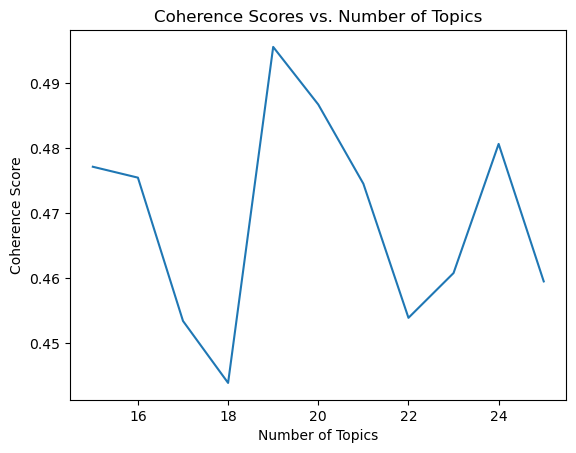

In [74]:
# Extract the data
num_topics = df['Num_Topics']
coherence = df['Coherence Score']

# Plot the coherence scores against the number of topics
plt.plot(num_topics, coherence)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores vs. Number of Topics')
plt.show()

# We can see that we have Maximim Coherence Score when Number of topics is 19

In [75]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=19, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [76]:
# Extract topics
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.025*"say" + 0.011*"people" + 0.009*"family" + 0.009*"day" + 0.008*"child" '
  '+ 0.008*"tell" + 0.008*"come" + 0.008*"home" + 0.008*"man" + 0.007*"go"'),
 (1,
  '0.022*"country" + 0.012*"say" + 0.011*"group" + 0.010*"year" + '
  '0.007*"threat" + 0.006*"terrorist" + 0.006*"world" + 0.006*"muslim" + '
  '0.006*"program" + 0.006*"refugee"'),
 (2,
  '0.008*"refugee_resettlement" + 0.004*"twin_fall" + 0.003*"ounce" + '
  '0.002*"resettling" + 0.001*"stranahan" + 0.001*"fawnbrook_case" + '
  '0.001*"infowar" + 0.000*"contrition" + 0.000*"crimes_committed" + '
  '0.000*"religious_minoritie"'),
 (3,
  '0.012*"accountable" + 0.007*"cheat" + 0.005*"oppress" + 0.002*"mass_grave" '
  '+ 0.001*"liberalism" + 0.000*"gigot" + 0.000*"engel" + 0.000*"chemical" + '
  '0.000*"license" + 0.000*"voltaire"'),
 (4,
  '0.011*"notorious" + 0.010*"saturday" + 0.008*"identification" + '
  '0.006*"bastion" + 0.006*"research_fellow" + 0.005*"known" + 0.005*"strap" + '
  '0.004*"waist" + 0.003*"colorful"

# Evaluation

In [77]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.094384979560845

Coherence Score:  0.49554223684739296


# Visualization

In [78]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.278197  0.187541       1        1  18.073547
5      0.300735  0.003613       2        1  16.104108
0      0.246112  0.048157       3        1  14.465969
15     0.294315 -0.183807       4        1  13.521139
1      0.247885  0.054656       5        1  11.055113
11     0.201933  0.161109       6        1  10.242446
7      0.277822 -0.150152       7        1   6.989526
10     0.196944  0.136659       8        1   5.409815
8      0.161018 -0.259888       9        1   3.873234
18    -0.218714  0.003235      10        1   0.133165
4     -0.223849 -0.001127      11        1   0.037265
12    -0.221524 -0.001382      12        1   0.024891
2     -0.220097  0.000210      13        1   0.019096
9     -0.223064 -0.000816      14        1   0.018451
16    -0.220650  0.000031      15        1   0.016199
3     -0.220614  0.000043      16        1   0.012165
14    -0.218816  0.000639      17        1   0.001335
13    -0.218816  0.000639      18        1   0.001269
17    -0.218816  0.000639      19        1   0.001268, topic_info=            Term          Freq         Total Category  logprob  loglift
32        attack   4095.000000   4095.000000  Default  30.0000  30.0000
298          say  16060.000000  16060.000000  Default  29.0000  29.0000
173      islamic   5632.000000   5632.000000  Default  28.0000  28.0000
329        state   7139.000000   7139.000000  Default  27.0000  27.0000
699        force   3923.000000   3923.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
25          army      0.000317    376.234985  Topic19 -10.3116  -2.7125
26        arrest      0.000317    586.326685  Topic19 -10.3116  -3.1561
27           ask      0.000317   1044.665986  Topic19 -10.3116  -3.7337
28     assailant      0.000317     96.569032  Topic19 -10.3116  -1.3525
29   assassinate      0.000317     19.045850  Topic19 -10.3116   0.2709

[1194 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         8  0.905836     abet
1         1  0.110420  ability
1         2  0.300587  ability
1         4  0.027605  ability
1         5  0.533695  ability
...     ...       ...      ...
4052      5  0.970232    yield
1743      3  0.695369    young
1743      5  0.013050    young
1743      6  0.290825    young
4550      8  0.987106  youtube

[1743 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 1, 16, 2, 12, 8, 11, 9, 19, 5, 13, 3, 10, 17, 4, 15, 14, 18])